In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

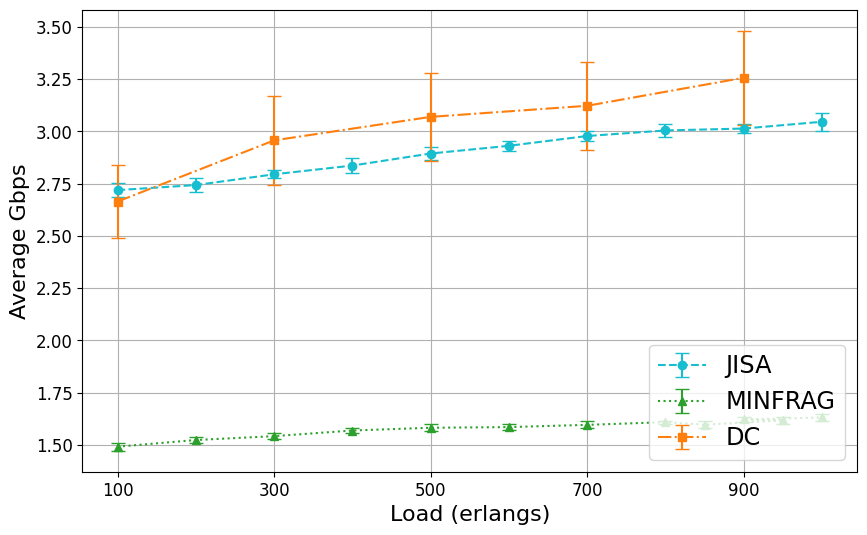

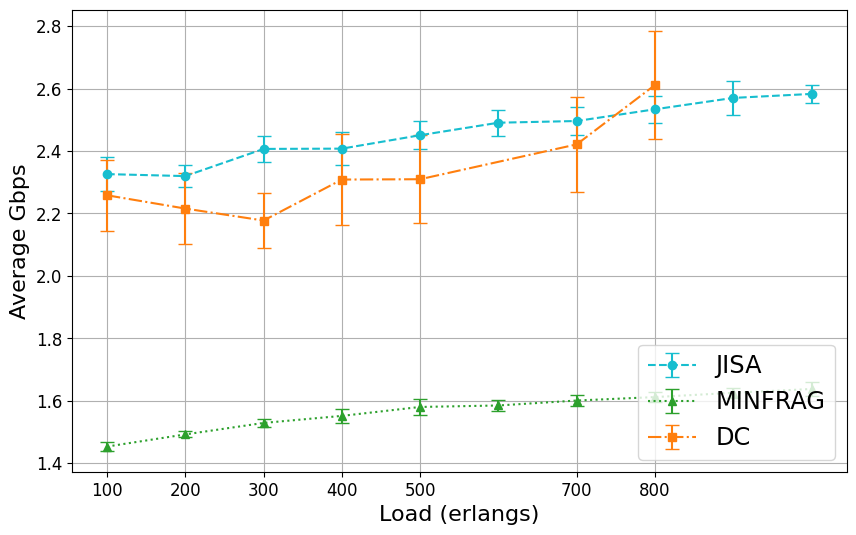

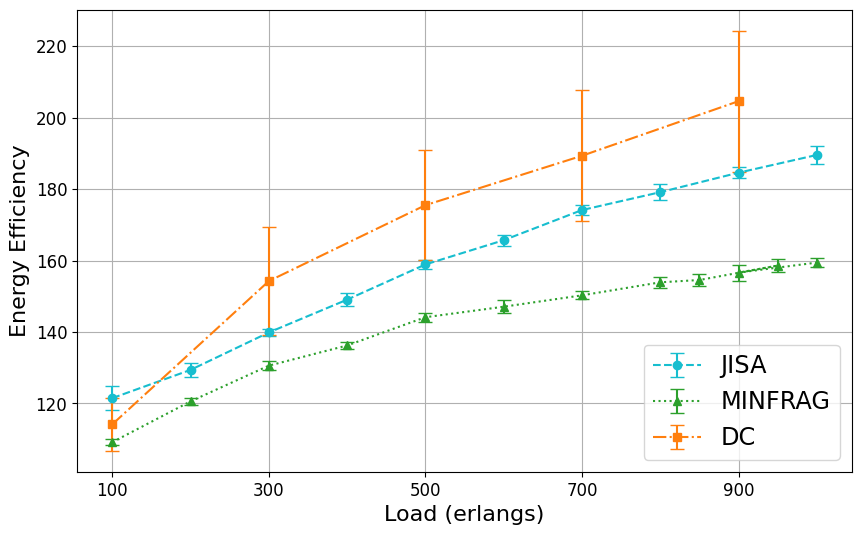

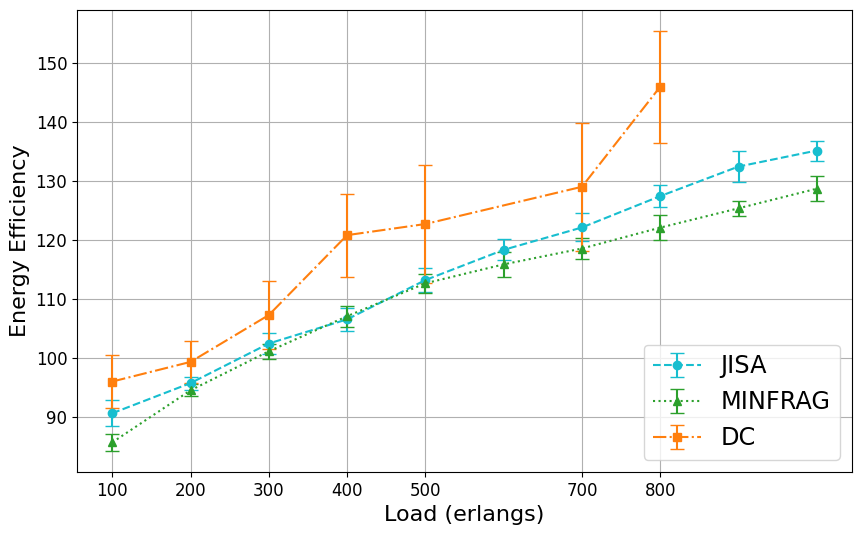

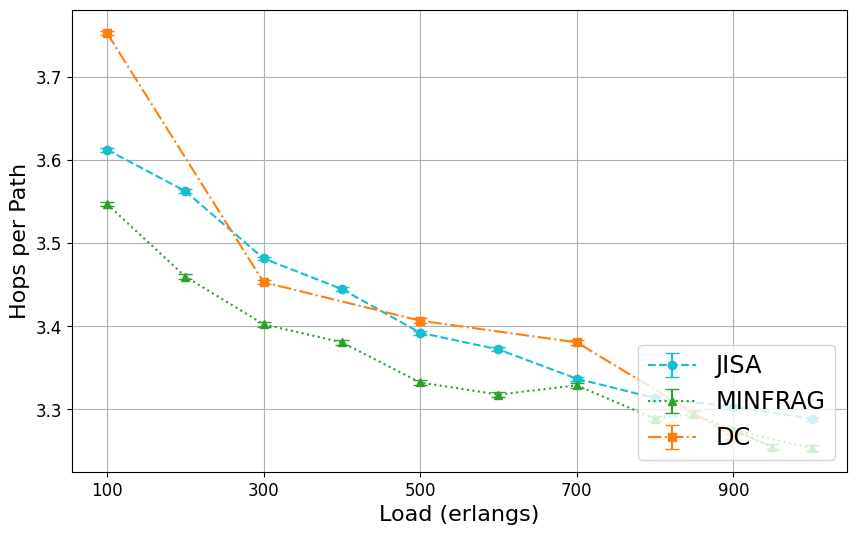

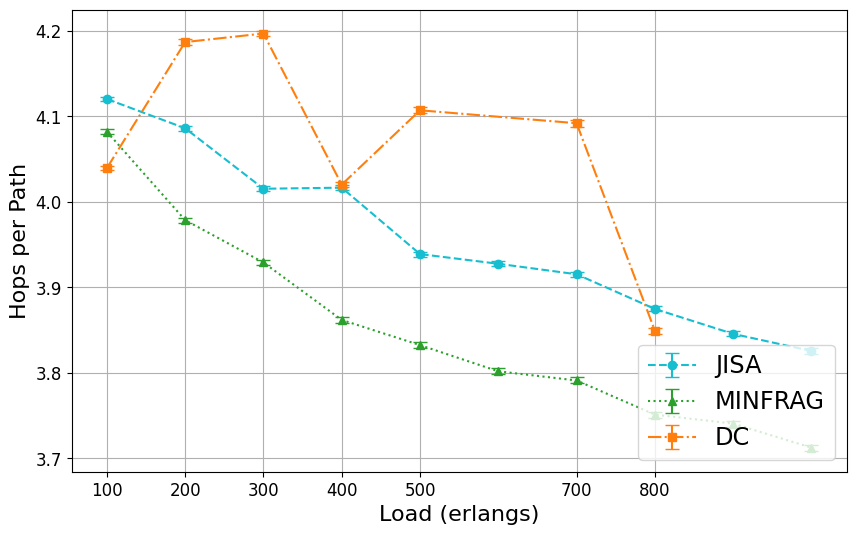

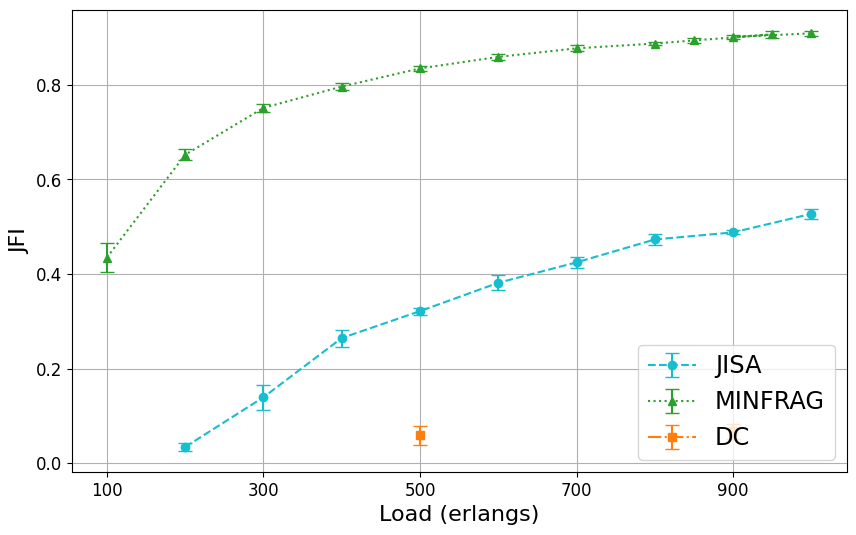

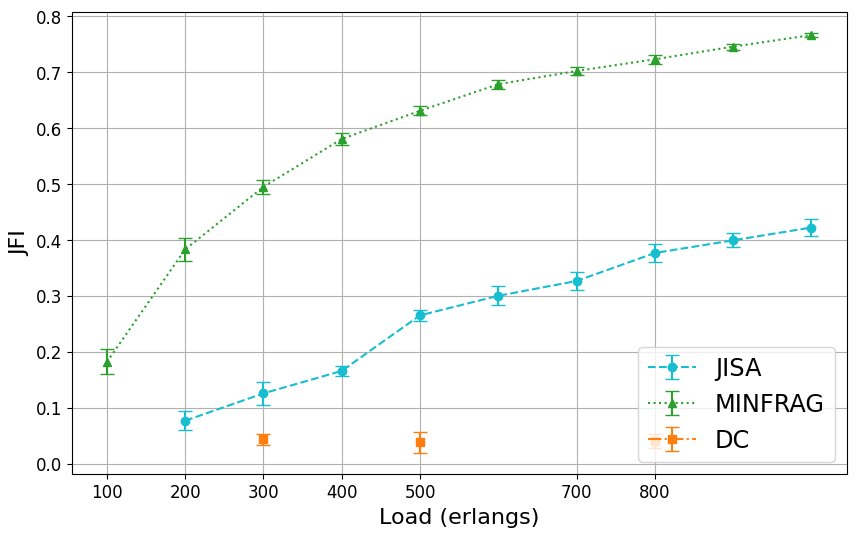

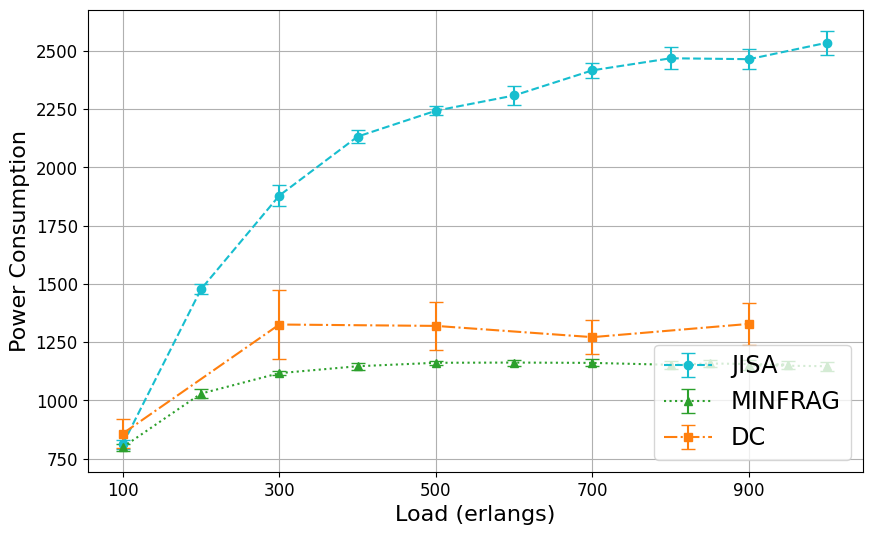

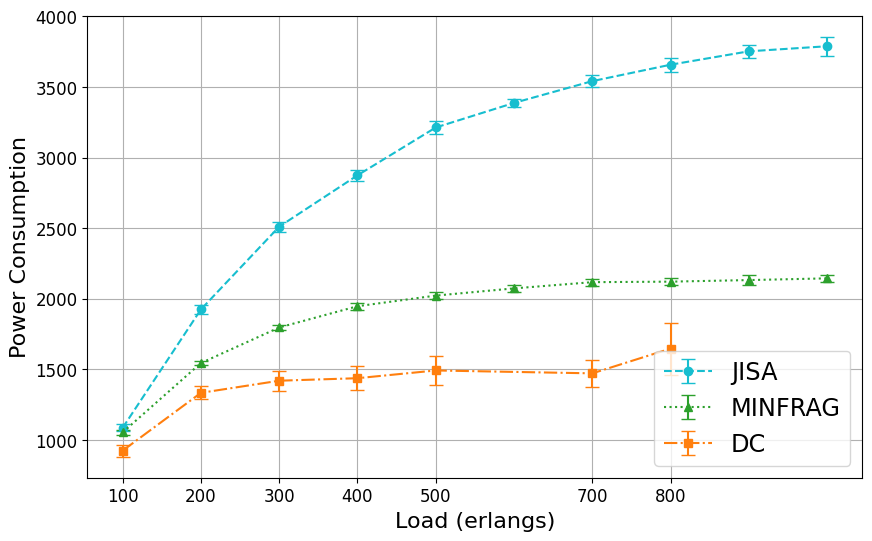

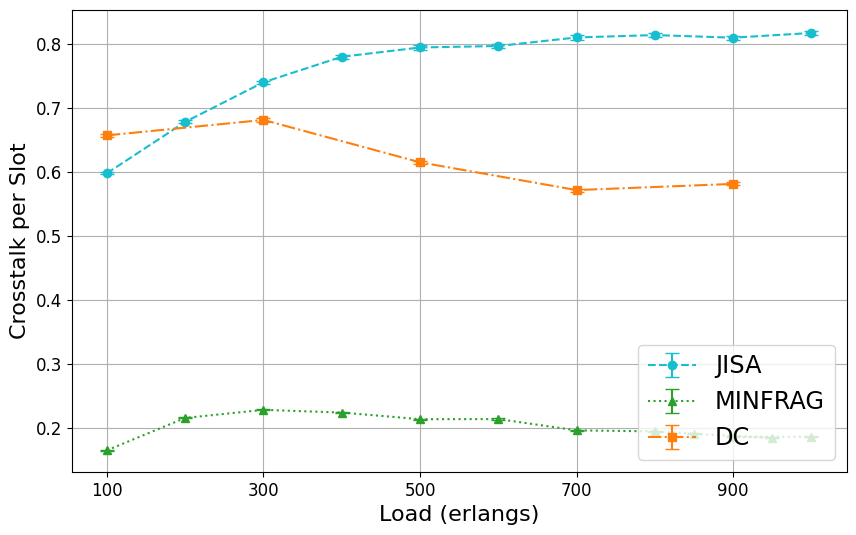

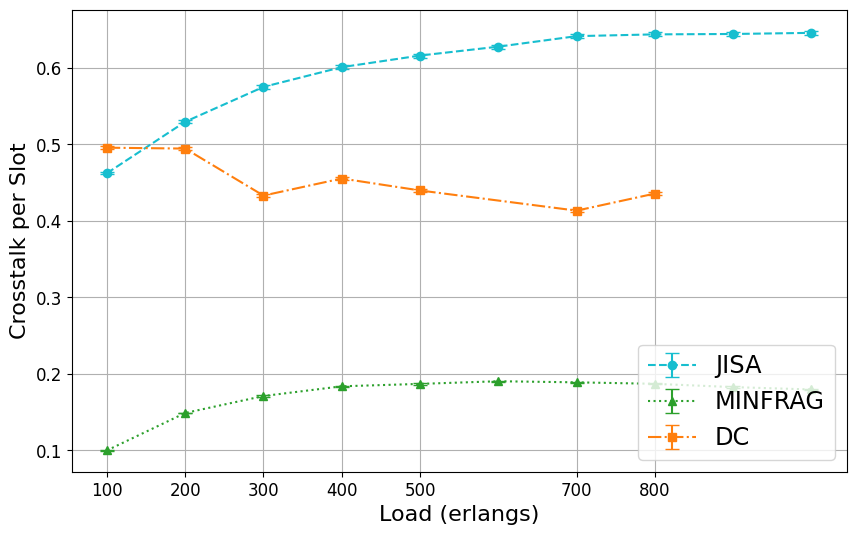

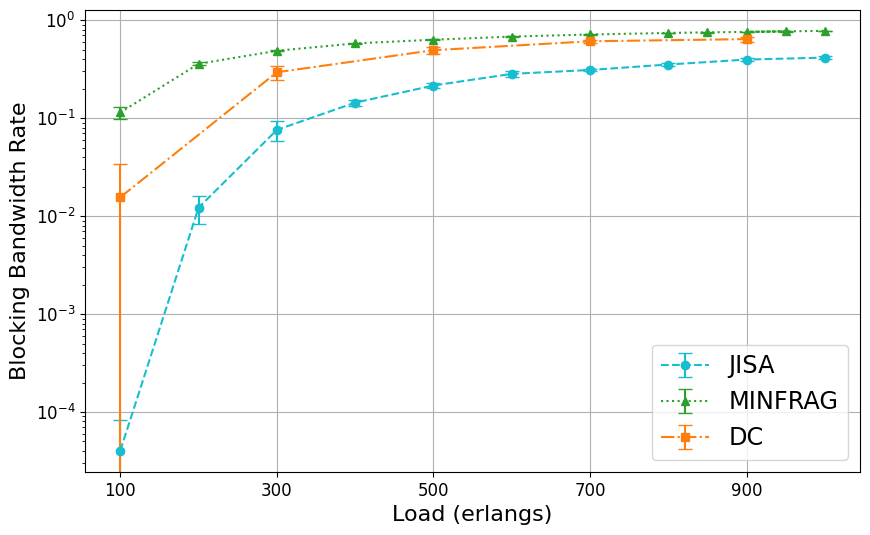

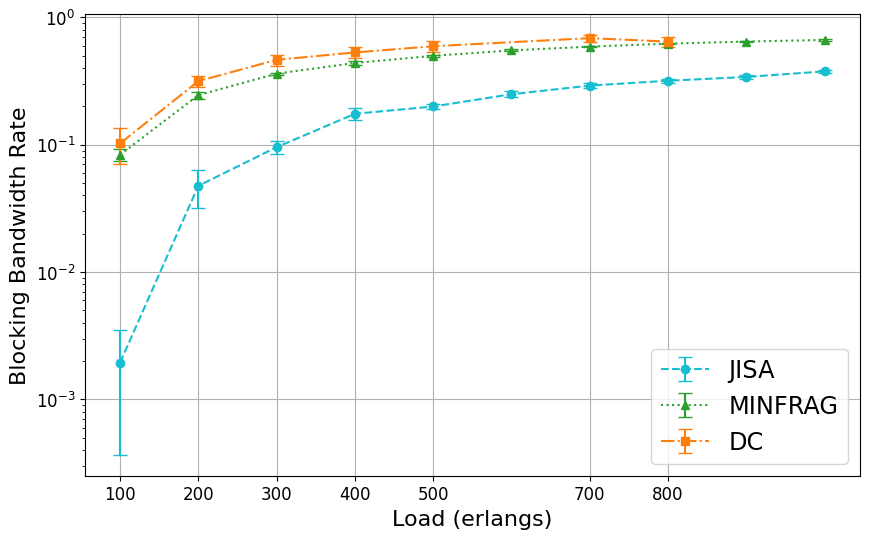

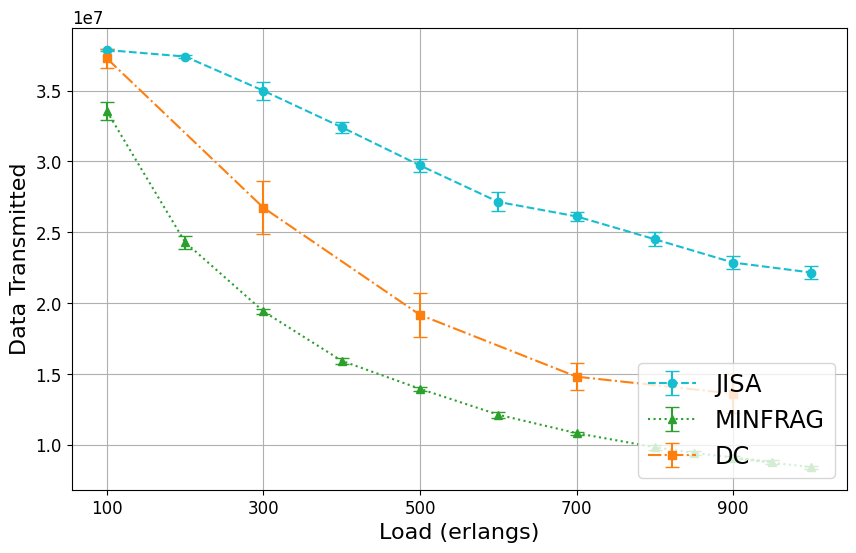

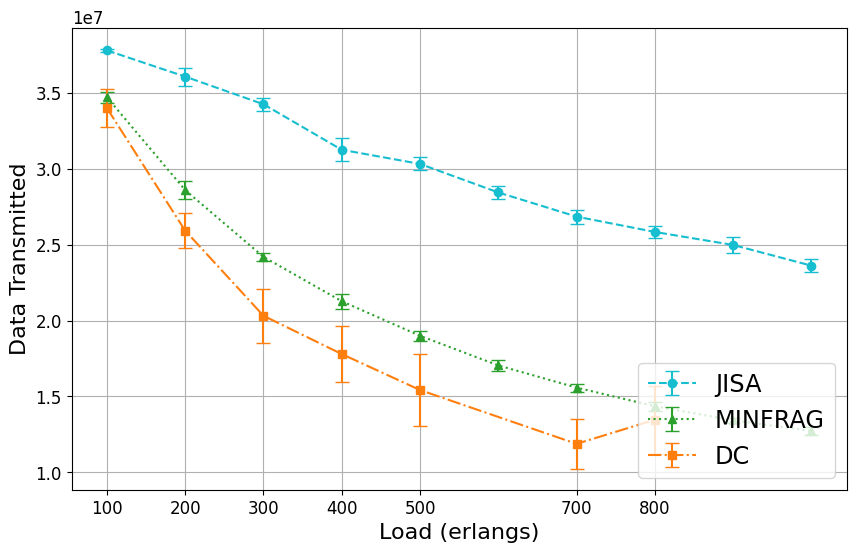

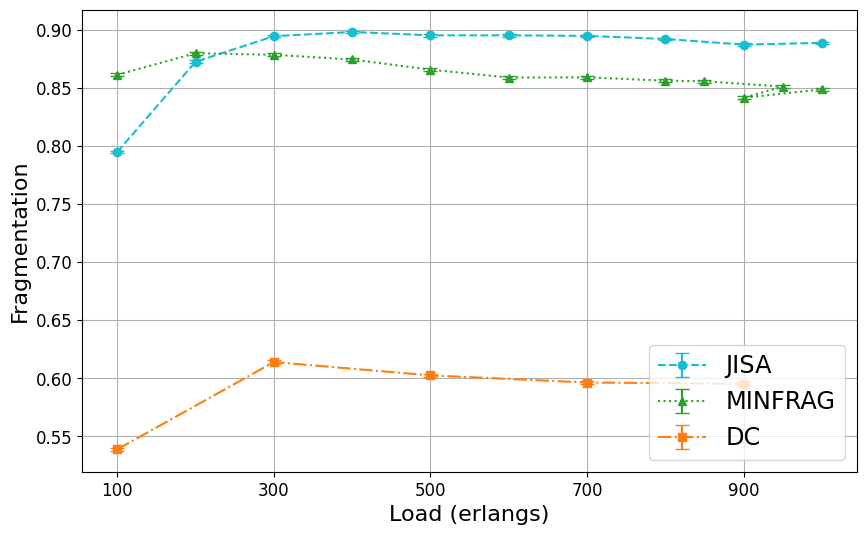

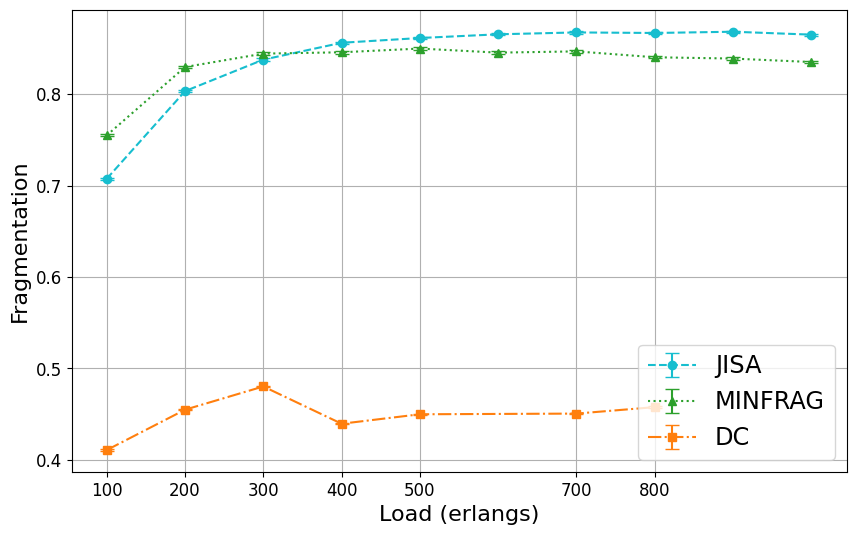

In [2]:
algorithms = ['SBRC', 'MINFRAG', 'DC']
metrics = ['avgbps', 'ee', 'hops', 'jfi', 'pc', 'xtps', 'mbbr', 'data', 'fragmentation']
names = ['Average Gbps', 'Energy Efficiency', 'Hops per Path', 'JFI', 'Power Consumption', 'Crosstalk per Slot', 'Blocking Bandwidth Rate', 'Data Transmitted', 'Fragmentation']
topologies = ['nsf', 'usa']
data_folder = './data'
log = ['mbbr']
# colors = ['blue', 'green', 'orange', 'red']
# ecolors = ['blue', 'green', 'orange', 'red']
colors = [
    '#17becf', # cyan
    '#2ca02c', # green
    '#ff7f0e', # orange
    '#1f77b4', # blue
    '#d62728', # red
    '#9467bd', # purple
    '#e377c2', # magenta
]
ecolors = [
    '#17becf', # cyan
    '#2ca02c', # green
    '#ff7f0e', # orange
    '#1f77b4', # blue
    '#d62728', # red
    '#9467bd', # purple
    '#e377c2', # magenta
]

lines = ['dashed', 'dotted', 'dashdot']
markers = ['o', '^', 's']
# fmts = ['o--', 'o--', 'o--', 'o--']

for metric in metrics:
    for topology in topologies:
        plt.figure(figsize=(10, 6))
        plt.rcParams.update({'font.size': 12})
        for algorithm in range(len(algorithms)):
            try:
                filename = f'{algorithms[algorithm]}-{topology}-{metric}.dat'
                full_path = os.path.join(data_folder, filename)
                data = pd.read_csv(full_path, header=None, delimiter='\t')
                
                x = data[0]
                y = data[1]
                confidence_interval = data[2]

                # Name exchange
                if algorithms[algorithm] == 'SBRC':
                    name = 'Redeclare'
                elif algorithms[algorithm] == 'MINFRAG':
                    name = 'Fragmentation'
                elif algorithms[algorithm] == 'DC':
                    name = 'Datacenter'
                else:
                    name = algorithms[algorithm]

                # plt.errorbar(x, y, yerr=confidence_interval, fmt='o', color=colors[algorithm], ecolor=ecolors[algorithm], capsize=5, label=name)
                plt.errorbar(x, y, yerr=confidence_interval, marker=markers[algorithm], linestyle=lines[algorithm], color=colors[algorithm], ecolor=ecolors[algorithm], capsize=5, label=name)
                # plt.title(metric.upper(), fontsize=20)
                plt.ylabel(metric.capitalize(), fontsize=16)
                plt.ylabel(names[metrics.index(metric)], fontsize=16)
                if metric in log:
                    plt.yscale('log')
            except:
                print('File not found.')

        # Adding titles and labels
        plt.legend(loc='lower right', fontsize='x-large')
        # plt.ylim(10**-3, 1)
        plt.xlabel('Load (erlangs)', fontsize=16)

        # Customize X-axis to show the point clearly
        plt.xticks(x)

        # Show plot
        plt.grid(True)
        plt.savefig(f'./figures/{metric}-{topology}.png', dpi=300, bbox_inches='tight')
        plt.show()

In [3]:
# Markers for curves
# https://matplotlib.org/stable/api/markers_api.html

linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

![alt text](sphx_glr_linestyles_001.webp)